<a href="https://colab.research.google.com/github/wi3jmu/AIS2023/blob/main/AIS_03_Descriptive_Analytics-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='bar_title'></div>

*Analytical Information Systems*

# AIS Tutorial 03 - Descriptive Analytics

Nico Elbert<br>
Chair of Information Systems and Business Analytics

Summer Semester 2023

### Recap: Data Visualization

**Why use Data Visualization?**

Data Visualization involves the depiction of information using spatial or graphical representations. This process facilitates comparison, pattern recognition, change detection, and other cognitive skills by making use of the visual system.

**Problem**

With big datasets, understanding them can be a challenge.

**Solution**

We take better advantage of the human perceptual system and convert information into a graphical representation.

**Issues**

There are several considerations when creating visualizations:

1. How to convert abstract information into graphical form?
2. Do visualizations do a better job than other methods?

### Graphical Excellence

Excellence in statistical graphics consists of complex ideas communicated with clarity, precision, and efficiency.

Good graphical displays should:

* Induce the viewer to think about the substance rather than about methodology, graphic design, the technology of graphic production or something else.
* Avoid distorting what the data has to say.
* Present many numbers in a small space.
* Make large data sets coherent.
* Encourage the eye to compare different pieces of data.
* Reveal the data at several levels of detail, from a broad overview to the fine structure.
* Serve a reasonably clear purpose: description, exploration, tabulation, or decoration.

### Graphical Integrity

The concept of Graphical Integrity states:

* The representation of numbers, as physically measured on the surface of the graphic itself, should be directly proportional to the numerical quantities represented.
* Clear, detailed, and thorough labeling should be used to defeat graphical distortion and ambiguity.
* Show data variation, not design variation.
* In time-series displays of money, deflated and standardized units of monetary measurement are nearly always better than nominal units.
* The number of information-carrying dimensions depicted should not exceed the number of dimensions in the data.
* Graphics must not quote data out of context.

In [1]:
#install all packages
!pip install matplotlib --q
!pip install seaborn --q
!pip install pandas --q

# Data Visualization in Python

Most of the material of this lecture is adopted from 
- https://github.com/LearnDataSci/article-resources 
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) - Essential Tools for Working with Data" By Jake VanderPlas,  O'Reilly Media



<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png" style="width:50%" />

#### Two ways of exploring data

<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/02/explore_data.png" style="width:60%" />

### Exploratory data analysis (EDA)

EDA allows to
* better understand the data
* build an intuition about the data
* generate hypotheses
* assess assumptions
* find insights

With EDA we can
* get comfortable with the data
* find magic features
* find mistakes or odd values

#### Building intuition about the data

<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/02/intuitive.png" style="width:80%" />

+ Is *336* a Typo?
+ Do we misinterpret the feature (*age in years*)?

## Introducing Pandas

The *pandas* package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

We will cover the essential bits of information about pandas, including how to install it, its uses, and how it works with other common Python data analysis packages such as **matplotlib**.

### Typical Use Cases

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like
    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?
- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 
- Store the cleaned, transformed data back into a CSV, other file or database

Before you jump into predictive or prescriptive modeling you need to have a good understanding of the nature of your dataset and pandas is a great avenue through which to do that.


### Pandas within the data science toolkit

Not only is the pandas library a central component of the data science toolkit but it is used in conjunction with other libraries in that collection. 

Pandas is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**.

Jupyter Notebooks offer a good environment for using pandas to do data exploration and modeling, but pandas can also be used in text editors just as easily.

Jupyter Notebooks give us the ability to execute code in a particular cell as opposed to running the entire file. This saves a lot of time when working with large datasets and complex transformations. Notebooks also provide an easy way to visualize pandas’ DataFrames and plots.



### Installation and Import
Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

`conda install pandas`

OR 

`pip install pandas`

Google Colab has pandas pre-installed.

To import pandas we usually import it with a shorter name since it's used so much:

In [2]:
import pandas as pd

## Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column vector, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/02/series-and-dataframe.png" style="width:60%" />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

### Creating DataFrames from scratch

Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs. There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let's say we are working on a fulfillment project. We want to have a row for each customer and one colum for order and delivery amount each. To organize this as a dictionary for pandas we could do something like:

In [3]:
data = {
    'ordered': [3, 2, 7, 3], 
    'delivered': [0, 2, 4, 2],
}
purchases = pd.DataFrame(data)
purchases

,ordered,delivered
0,3,0
1,2,2
2,7,4
3,3,2


### Indexing DataFrames

Each *(key, value)* item in `data` corresponds to a *column* in the resulting DataFrame. The **Index** of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame. 

Let's have customer names as our index: 

In [4]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,ordered,delivered
June,3,0
Robert,2,2
Lily,7,4
David,3,2


So now we could **loc**ate a customer's order status by using their name:

In [5]:
purchases.loc['June']

ordered      3
delivered    0
Name: June, dtype: int64

In [6]:
purchases.iloc[1]

ordered      2
delivered    2
Name: Robert, dtype: int64

### Reading and writing CSVs
It’s quite simple to load data from various file formats into a DataFrame. With CSV files all you need is a single line to load in the data.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/data/purchases.csv')
df

,customer,ordered,delivered
0,June,3,0
1,Robert,2,2
2,Lily,7,4
3,David,3,2


After extensive data preparation you likely want to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [8]:
df.to_csv('new_purchases.csv')

## Basic DataFrame operations: Viewing

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset to begin. We're loading this dataset from a CSV and designating the movie titles to be our index.

In [9]:
movies_df = pd.read_csv("https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/data/IMDB-Movie-Data.csv", index_col="Title")

### Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference.

Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. To see the **last** five rows use `.tail()`.

In [10]:
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### Getting info about your data `.info()`

`.info()` should be one of the very first commands you run after loading your data. `.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


### Getting info about your data: `.shape`

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns).

In [12]:
movies_df.shape

(1000, 11)

Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

The `.shape` command is used a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

### Describing your variables
Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables. Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually. 

In [13]:
movies_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Describing Categorical Variables
`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [14]:
movies_df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

`.value_counts()` can tell us the frequency of all values in a column:

In [15]:
movies_df['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

## Basic DataFrame operations: Data Cleaning

### Handling duplicates (1)
Duplicate management is key in most settings involving real data. It is a central data intgegration challenge and we want to be able to perform some basic activities using pandas. This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself. Using `append()` will return a copy without affecting the original DataFrame. We are capturing this copy in `temp` so we aren't working with the real data:

In [16]:
temp_df = pd.concat([movies_df,movies_df])
temp_df.shape

(2000, 11)

Now we can try dropping duplicates. Just like `append()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Calling `.shape` confirms we're back to the 1000 rows of our original dataset.

In [17]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

### Handling duplicates (2)

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:
* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` arugment in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Watch what happens to `temp_df`:

In [18]:
temp_df = pd.concat([movies_df,movies_df])  # make a new copy
temp_df = temp_df.drop_duplicates(keep=False)
temp_df.shape

(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

### Inplace Operations

It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the `inplace` keyword argument on many of its methods. Using `inplace=True` will modify the DataFrame object in place:

In [19]:
temp_df = pd.concat([movies_df,movies_df])  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names. Here's how to print the column names of our dataset:

In [20]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Not only does `.columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

### Renaming Columns

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:

In [21]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Excellent. But what if we want to lowercase all names? Instead of using `.rename()` we could also set a list of names to the columns like so:

In [22]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### Operating on many columns
With thousands of columns the previous approach is too much work. Instead of just renaming each column manually we can do a list comprehension:

In [23]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

`list` (and `dict`) comprehensions come in handy a lot when working with pandas and data in general.

It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.

### Working with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls: 

1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

### Identify missing values
`isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.


In [24]:
movies_df.isnull().head(5)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False


`.isnull()` just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`. To count the number of nulls in each column we use an aggregate function for summing: 

In [25]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

### Removing null values

Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:

In [26]:
df_clean = movies_df.dropna()
df_clean.shape

(838, 11)

This operation deletes any **row** with at least a single null value. In our case, it removes 128 rows where `revenue_millions` is null and 64 rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 

Let's look at imputing the missing values in the `revenue_millions` column:

In [27]:
revenue = movies_df['revenue_millions']

Using square brackets is the general way we select columns in a DataFrame. `revenue` is a Series and we can calculate its mean and fill the nulls using `fillna()`:

In [28]:
revenue_mean = revenue.mean()
print(revenue_mean)
revenue.fillna(revenue_mean, inplace=True)

82.95637614678898


We have now replaced all nulls in `revenue` with the mean of the column:

In [29]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputing an entire column with the same value like this is a basic example. It would be a better idea to try a more granular imputation by Genre or Director. For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.


## Basic DataFrame operations: Slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using `fillna()`. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors. 

Let's look at working with columns first.

### By column

You already saw how to extract a column using square brackets like this:

In [30]:
genre_col = movies_df['genre']
type(genre_col)

pandas.core.series.Series

This will return a *Series*. To extract a column as a *DataFrame*, you need to pass a list of column names:

In [31]:
genre_col = movies_df[['genre']]
type(genre_col)

pandas.core.frame.DataFrame

Since it's just a list, adding another column name is easy:

In [32]:
subset = movies_df[['genre', 'rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


### By row
For rows, we have two options: 
- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

In [33]:
prom = movies_df.loc["Prometheus"]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

With `iloc` we give it the numerical index of Prometheus:

In [34]:
prom = movies_df.iloc[1]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

### Conditional selections
We’ve gone over how to select columns and rows, but what if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [35]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


### Combining conditions
We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [36]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


### Combining conditions (2)
We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.

`(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')`

Using the `isin()` method we could make this more concise:

In [37]:
selection = ['Christopher Nolan', 'Ridley Scott']
movies_df[movies_df['director'].isin(selection)].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


### Combining conditions (3)
Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

In [38]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

Let's calculate some statistics 

In [39]:
movies_df['revenue_millions'].median()

60.375

###### GroupBy: Split, Apply, Combine
Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/03.08-split-apply-combine.png" style="width:60%" />


##### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [40]:
movies_df.groupby('genre')

In [41]:
movies_df.groupby('genre')['revenue_millions']

In [42]:
movies_df.groupby('genre')['revenue_millions'].median().sort_values(ascending=False)

genre
Adventure,Drama,Fantasy       286.79
Action,Adventure              262.03
Adventure,Fantasy             258.36
Animation,Action,Adventure    215.40
Action,Fantasy,War            210.59
                               ...  
Animation,Comedy,Drama          0.29
Horror,Mystery,Sci-Fi           0.15
Adventure                       0.15
Action,Biography,Crime          0.10
Adventure,Drama                 0.06
Name: revenue_millions, Length: 207, dtype: float64

## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [43]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [44]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)
movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


Besides being much more concise than a loop structure, using `apply()` will also be much faster than iterating manually over rows because pandas is utilizing vectorization.

# Introduction into Matplolib
Matplotlib is one of the most popular Python libraries for creating 2D plots and graphs. It's capable of producing a wide range of different plot types, and it's highly customizable.

You can find the documentation here: https://matplotlib.org/stable/index.html





In [45]:
# First, we need to import the library.
import matplotlib.pyplot as plt


## Matplotlib Basics: Figures and Axes
In matplotlib, a plot is contained within a "Figure" object. Within this Figure, there are one or more "Axes".

A Figure in matplotlib can be thought of as a canvas upon which we draw our plot. Axes, on the other hand, are the actual plots that we draw within the Figure.

The below line of code creates a Figure object, and then an Axes object within it. The Axes object is what we'll be interacting with most often when creating plots.




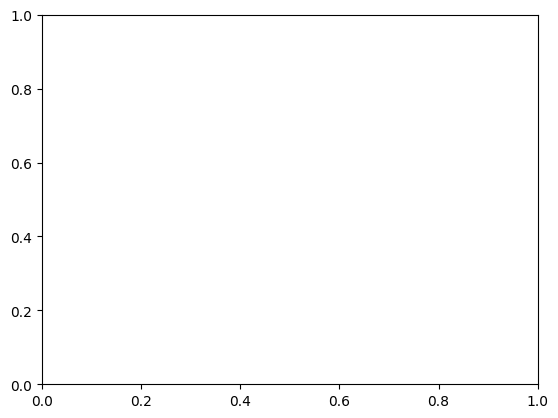

In [46]:
# Here's an example of creating a Figure and an Axes.
fig, ax = plt.subplots()

## Basic Plot
Let's create a simple line plot. We'll use numpy to create some data first.

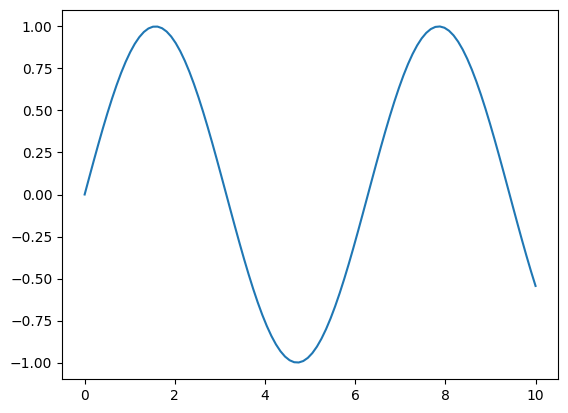

In [47]:
import numpy as np

# Creating data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Creating plot
fig, ax = plt.subplots()

# Plotting data on the Axes
ax.plot(x, y)

# Always include the following line in your notebooks to make sure your plot is displayed.
plt.show()


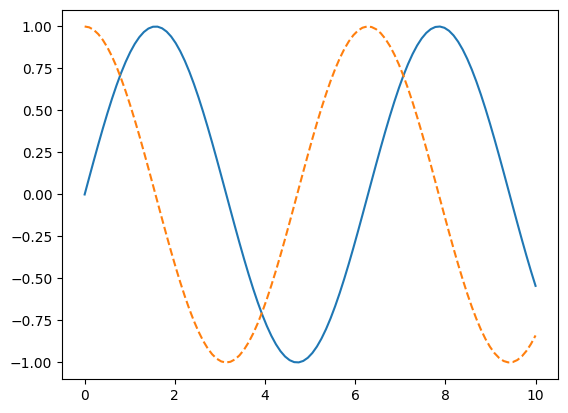

In [48]:
import numpy as np

# Creating data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Creating plot
fig, ax = plt.subplots()

# Plotting data on the Axes
ax.plot(x, y1, '-')
ax.plot(x, y2, '--')


# Always include the following line in your notebooks to make sure your plot is displayed.
plt.show()


In [49]:
#elaborate on plt.show


## Adding Titles, Labels and Legends
Let's now add a title to our plot, as well as labels for the x and y axes. These features improve the readability and usefulness of our plots.

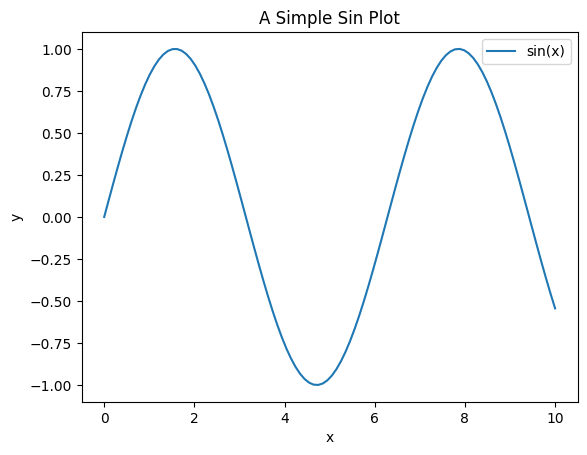

In [50]:
# Creating plot
fig, ax = plt.subplots()

# Plotting data on the Axes
ax.plot(x, y, label='sin(x)')

# Adding title and labels
ax.set_title('A Simple Sin Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Adding legend
ax.legend()

# Displaying the plot
plt.show()


In [51]:
#elaborate on legend function

## Customizing Plot Appearance
Matplotlib offers extensive customization options to make your plots visually appealing and convey information effectively. Let's explore a few customization techniques.

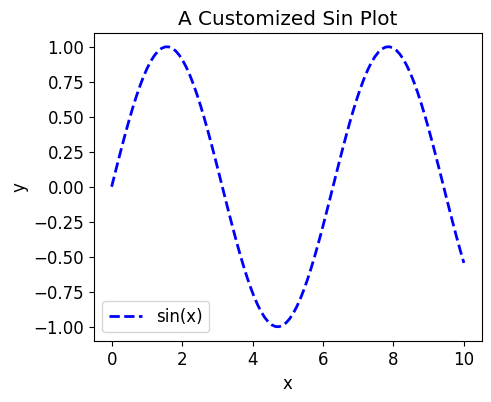

In [52]:
#you can change options, such as the font size(in points) or the figure size(in inches) 
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 4)}) # set font and plot size to be larger

# Creating plot
fig, ax = plt.subplots()

# Plotting data on the Axes
ax.plot(x, y, label='sin(x)', color='blue', linestyle='--', linewidth=2)

# Adding title and labels
ax.set_title('A Customized Sin Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Adding legend
ax.legend()



# Displaying the plot
plt.show()


In the code above, we have customized our plot by specifying the color, line style, and line width using the corresponding arguments in the plot() method. We can also customize other elements such as markers, gridlines, and axis limits.

## Multiple Plots in the Same Figure
Matplotlib allows us to create multiple plots within the same Figure, enabling side-by-side comparison or visualization of multiple datasets.

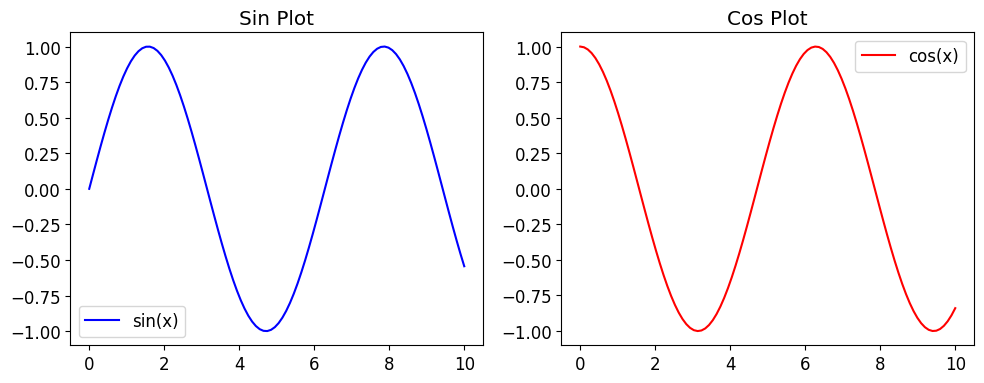

In [53]:
# Creating data for the second plot
y2 = np.cos(x)

# Creating plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotting data on the first Axes
ax1.plot(x, y, label='sin(x)', color='blue')
ax1.set_title('Sin Plot')
ax1.legend()

# Plotting data on the second Axes
ax2.plot(x, y2, label='cos(x)', color='red')
ax2.set_title('Cos Plot')
ax2.legend()

# Adjusting spacing between subplots
fig.tight_layout()

# Displaying the plot
plt.show()


In the code above, we use the subplots() function to create two Axes objects side by side. Each Axes is assigned to a separate variable (ax1 and ax2), allowing us to customize and plot data independently.

## Saving Plots
Matplotlib provides the ability to save your plots as image files in various formats, such as PNG, JPEG, PDF, and SVG. Let's see how to save our plot as a PNG file.



In [54]:
# Saving the plot as a PNG file
fig.savefig('my_plot.png', dpi=300)


## Plot Types


### Line Plot

#### Necessary Inputs:

- `x, y`: Arrays or lists of numeric values representing the coordinates of the points in the plot.

#### Optional Inputs:

- `color`: A string specifying the color of the line.
- `linewidth`: A number specifying the width of the line.
- `linestyle`: A string specifying the style of the line (e.g. '-', '--', '-.', ':').
- `marker`: A string specifying the marker style (e.g. 'o', 'v', '^', '<', '>', 's', '*', 'h', 'H', 'D', 'd', 'P', 'X').
- `label`: A string specifying the label for the line, which will be shown in the legend.
"""

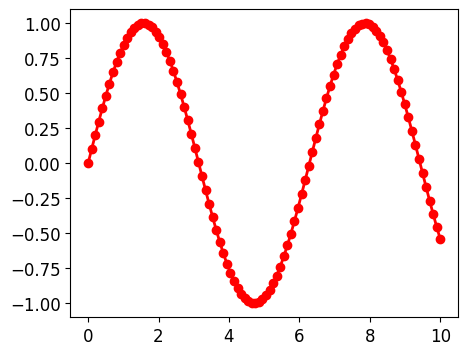

In [55]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, color='red', linewidth=2, linestyle='-', marker='o', label='My Line')
plt.show()


### Scatter Plot

#### Necessary Inputs:

- `x, y`: Arrays or lists of numeric values representing the coordinates of the points in the plot.

#### Optional Inputs:

- `s`: A scalar or an array of the same length as `x` and `y` to specify the size of the markers.
- `c`: A color or sequence of colors for the markers.
- `marker`: A string specifying the marker style.
- `alpha`: A number between 0 (transparent) and 1 (opaque) specifying the transparency of the markers.
"""

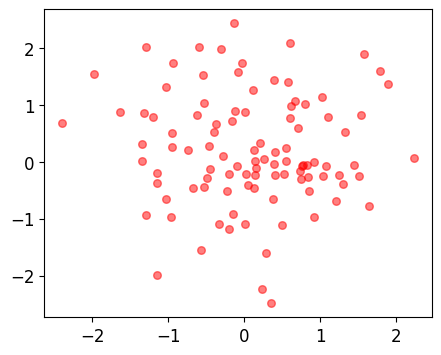

In [56]:
x = np.random.randn(100)
y = np.random.randn(100)

fig, ax = plt.subplots()
ax.scatter(x, y, s=30, c='red', marker='o', alpha=0.5)
plt.show()

### Histogram

#### Necessary Inputs:

- `x`: An array or list of numeric values for which the histogram will be computed.

#### Optional Inputs:

- `bins`: An integer or sequence or 'auto', optional. If an integer is given, `bins + 1` bin edges are calculated and returned.
- `color`: A string specifying the color of the histogram.
- `alpha`: A number between 0 (transparent) and 1 (opaque) specifying the transparency of the histogram.
- `density`: A boolean, if `True`, the first element of the return tuple will be the counts normalized to form a probability density.
"""


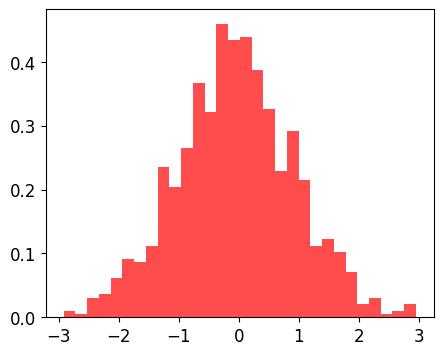

In [57]:
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x, bins=30, color='red', alpha=0.7, density=True)
plt.show()


### Bar Chart

#### Necessary Inputs:

- `x`: A sequence of scalars representing the x coordinates of the bars. See also `align` for the alignment of the bars to the coordinates.
- `height`: A scalar or sequence of scalars, the heights of the bars.

#### Optional Inputs:

- `width`: A scalar or array-like (optional). The width(s) of the bars.
- `color`: A string specifying the color of the bars.
- `edgecolor`: A string specifying the color of the bar borders.
- `align`: `{center, edge}`, optional, default: `center`.

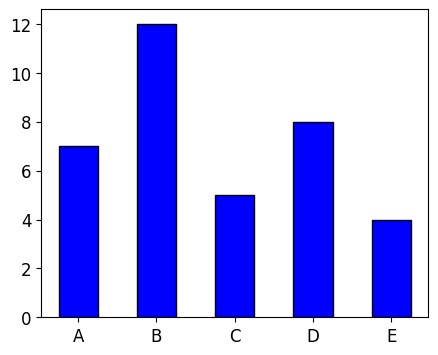

In [58]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [7, 12, 5, 8, 4]

fig, ax = plt.subplots()
ax.bar(categories, values, width=0.5, color='blue', edgecolor='black', align='center')
plt.show()


### Box Plot

#### Necessary Inputs:

- `x`: The input data. This can be a 1-D sequence or array or a sequence of sequences if multiple data sets are being plotted.

#### Optional Inputs:

- `notch`: A boolean, if `True`, will produce a notched box plot.
- `vert`: A boolean, if `True` (default), makes the boxes vertical. If `False`, everything is drawn horizontally.
- `patch_artist`: A boolean, if `True`, boxes will be filled. (Default is `False`).
- `widths`: The widths of the boxes.
- `showcaps`: A boolean, if `True`, show the caps on the ends of whiskers.

Please note that these are only a subset of possible parameters for each function. Refer to the Matplotlib documentation for a complete list.

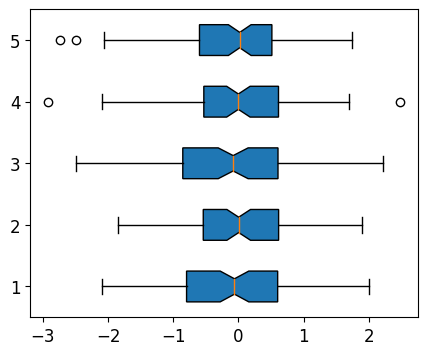

In [59]:
data = [np.random.randn(100) for _ in range(5)]

fig, ax = plt.subplots()
ax.boxplot(data, notch=True, vert=False, patch_artist=True, widths=0.5, showcaps=True)
plt.show()


### Pie Chart

#### Necessary Inputs:

- `x`: Array-like. The wedge sizes.

#### Optional Inputs:

- `explode`: Array-like, optional, default: None. If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.
- `labels`: List of str, optional. The labels for each wedge.
- `colors`: Array-like, optional. A sequence of colors through which the pie chart will cycle.
- `autopct`: None (default), str, or function, optional. If not None, is a string or function used to label the wedges with their numeric value.
"""

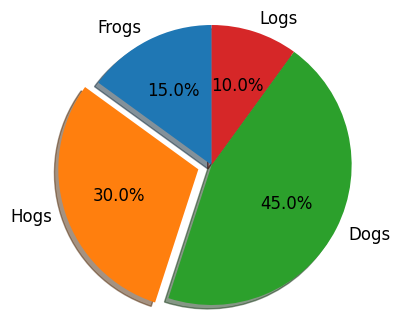

In [60]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Area Plot

#### Necessary Inputs:

- `x`: Array-like or scalar. The x coordinates of the left sides of the bars

#### Optional Inputs:

- `y`: Array-like, optional. The heights of the bars.
- `stacked`: In line and bar plots, this applies only to column-wise data and stacks the columns. In area plot, this stacks the areas in a single plot.

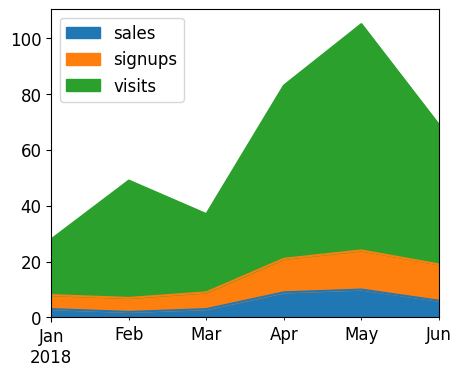

In [61]:
df = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
df.plot.area()
plt.show()


### Violin Plot

#### Necessary Inputs:

- `dataset`: Array or sequence of vectors.

#### Optional Inputs:

- `vert`: If true (default), makes the violins vertical. If false, everything is drawn horizontally.
- `widths`: Either a scalar or a vector that sets the maximal width of each violin.
- `showmedians`: If True, will toggle rendering of the medians.

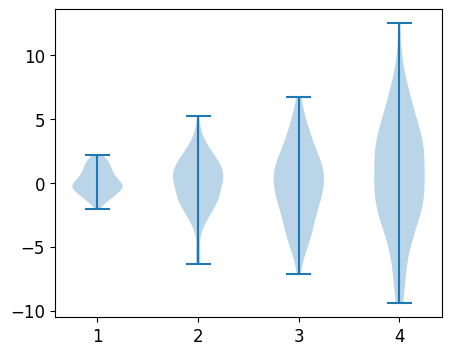

In [62]:
data = [np.random.normal(0, std, 100) for std in range(1, 5)]

fig, ax = plt.subplots()
ax.violinplot(data)
plt.show()


markdown_text = """
### Quiver Plot

#### Necessary Inputs:

- `X, Y, U, V`: The x, y coordinates, and the horizontal and vertical vectors.

#### Optional Inputs:

- `C`: The colors of the arrows.
- `angles`: The angles of the arrows. If set to 'xy', the arrows point from (x,y) to (x+u, y+v).
- `scale`: If scale is None (default), the arrows are drawn in the unit specified in the xy coordinate system.
- `width`: The width of the arrow shafts.

"""

print(markdown_text)


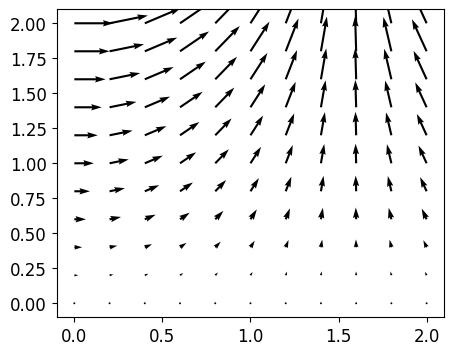

In [63]:
x = np.arange(0, 2.2, 0.2)
y = np.arange(0, 2.2, 0.2)
X, Y = np.meshgrid(x, y)
U = np.cos(X)*Y
V = np.sin(X)*Y

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V, units='width')
plt.show()

## Examples with additional libraries

### 3D Plot

#### Necessary Inputs:

- `X, Y, Z`: 1D or 2D arrays representing the (X, Y) coordinates and Z values of the surface.

#### Optional Inputs:

- `color`: The color of the surface.
- `cmap`: The colormap of the surface.
- `edgecolor`: The color of the lines on the surface.

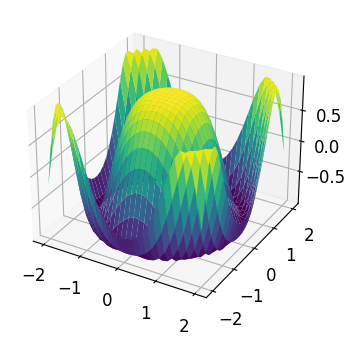

In [64]:
from mpl_toolkits.mplot3d import Axes3D

x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.show()


### Heatmap

#### Necessary Inputs:

- `data`: 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

#### Optional Inputs:

- `vmin, vmax`: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
- `cmap`: The mapping from data values to color space.
- `center`: The value at which to center the colormap when plotting divergant data.
"""

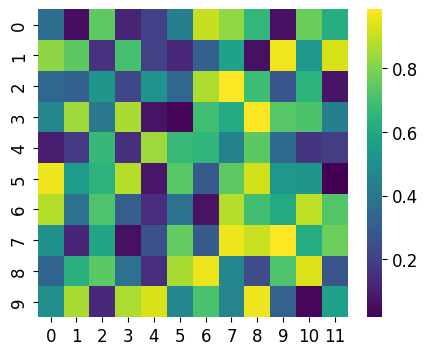

In [65]:
import seaborn as sns
data = np.random.rand(10, 12)
ax = sns.heatmap(data, cmap='viridis')
plt.show()


## Coloring in Data Visualization

The way data is colored in a visualization can greatly impact the interpretation and effectiveness of the image. We generally have two types of data that we might want to color - continuous data and categorical (qualitative) data.

#### Continuous Data:

Continuous data are numerical values that can be measured on a scale and have a meaningful order or ranking. For example, temperature or height. When coloring continuous data:

- The differences between your color steps should be significant enough to differentiate, but not so high that they skew perception of the data distribution.
- Use Sequential palettes. These palettes have a natural progression of colors - either single hue or multi-hue. An example of a single hue palette is a grayscale, where color progresses from white to black. Multi-hue palettes transition between two or more colors.

![Matplotlib Colormaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_001.png)
![Matplotlib Colormaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png)
![Matplotlib Colormaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_003.png)


- Use Diverging palettes when your data has a critical midpoint like an average or zero. The colors diverge from the midpoint to extreme high and low values. This type of palette is best when the data's extremes are more interesting than the middle values.
![Matplotlib Colormaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png)



#### Cyclic Data:

Cyclic data is a type of data that undergoes cycles in a predictably recurring manner. The data does not have a start or end but continuously cycles through the same sequence. Examples of this kind of data are the hours of a day, days of a week, months in a year, or angles in a circle. When coloring cyclic data:

- Choose colors that can represent the cyclic nature of your data. You want to make sure each color is distinguishable and makes sense in a cyclic pattern.
- Use Cyclic palettes which are designed to wrap around, perfect for representing data with a repeating nature. These palettes are best used when your data's high and low values meet and repeat, such as in a circular pattern.



![Matplotlib Colormaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_005.png)


#### Qualitative Data:

Qualitative data is non-numerical data like categories, names, or labels. When coloring qualitative data:

- Choose colors that go well together and attract the reader’s eye. You want to make sure each color is distinguishable, but also that they make sense together.
- Use Qualitative palettes which are used to color nominal data - data without an intrinsic order or ranking.

![Matplotlib Colormaps](https://matplotlib.org/stable/_images/sphx_glr_colormaps_006.png)


# Let's get back to our data

### Plotting Directly from Pandas DataFrame

Pandas DataFrame provides an in-built `.plot()` function that allows you to create a variety of visualizations directly. This function is essentially a wrapper around Matplotlib's plotting functionality. This means it leverages Matplotlib under the hood to create the plots. Because of this, many of the functions, techniques, and principles you've learned about Matplotlib can be applied when plotting directly from a DataFrame.

How does it work?

When you call `.plot()` on a DataFrame, pandas prepares a plot with Matplotlib using the data in the DataFrame. The `kind` parameter determines what kind of plot to create. For example, `kind='line'` creates a line plot, `kind='bar'` creates a bar plot, etc. Depending on the kind of plot, the `.plot()` function will make intelligent decisions about how to use the DataFrame's index and columns.

How does it relate to what we've learned about Matplotlib?

Since pandas uses Matplotlib for plotting, we can interact with the Matplotlib objects directly. After calling `.plot()`, you'll get a Matplotlib `AxesSubplot` object. You can use this to set labels, titles, modify the axes, etc., like you would do with any other Matplotlib plot.

Furthermore, you can pass many of the same parameters to `.plot()` that you can pass to the equivalent Matplotlib function. For example, you can pass `color` to set the color, `linestyle` to set the line style, etc. This gives you the power and flexibility of Matplotlib with the simplicity and convenience of pandas.


### Difference Between ax.scatter() and df.plot(kind='scatter')

1. `ax.scatter()`: This method is a part of the Matplotlib's axes object. It creates a scatter plot, which is a type of plot using Cartesian coordinates to display values for typically two variables from a dataset. The data is displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. When using `ax.scatter()`, you need to manually supply the x and y arrays.

2. `df.plot(kind='scatter')`: This method is a part of the pandas DataFrame API. It is essentially a wrapper around Matplotlib's plotting functionality (including `ax.scatter()`) that takes the column names of the DataFrame for the x and y coordinates. This makes it easier and more convenient to plot data directly from DataFrames. Underneath, it uses Matplotlib to generate scatter plots. Therefore, many of the customizations that you can do in Matplotlib (like color, size, transparency, etc.) are available when plotting directly from a DataFrame.

To summarize, `ax.scatter()` and `df.plot(kind='scatter')` both create scatter plots, but the former requires manual data extraction and is more flexible, while the latter works directly with pandas DataFrames and is easier for quick plots.


### Scatterplot

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

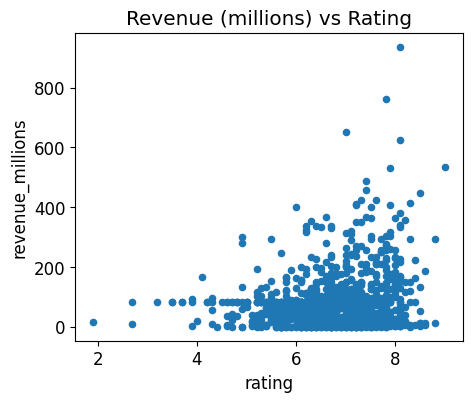

In [66]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

The semicolon is not a syntax error, just a way to hide extra output in Jupyter notebooks.

### Histogram
If we want to plot a simple Histogram based on a single column, we can call plot on a column:

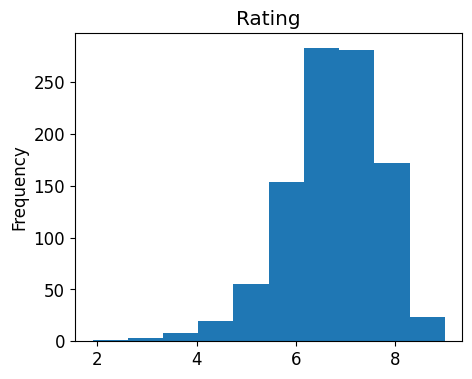

In [67]:
movies_df['rating'].plot(kind='hist', title='Rating');

### Boxplot
Using a Boxplot we can visualize the rating quartiles of the n directors with the most movies:

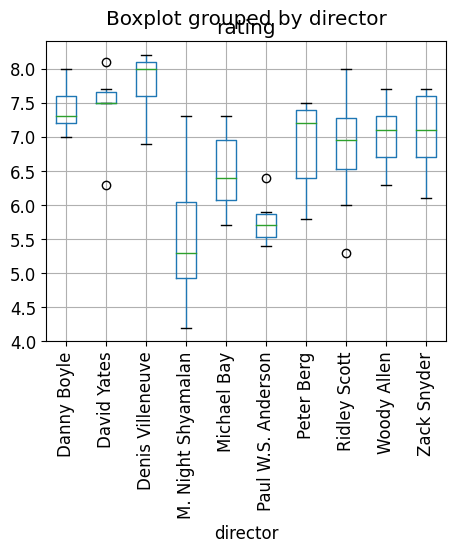

In [68]:
n=10
directors = movies_df['director'].value_counts()[:n].index.tolist()
chart = movies_df[movies_df['director'].isin(directors)].boxplot(column=['rating'], by="director")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## Your Turn!

### Histogram of Movie Runtimes

A histogram is an accurate representation of the distribution of numerical data. Here, we will visualize the distribution of movie runtimes using a histogram.


In [69]:
#your code here

### Scatter Plot: Movie Runtime vs Rating

A scatter plot can be used to find the correlation between two variables. Here, we will plot the movie runtime against its rating to see if there's any relationship.


In [70]:
#your code here

### Pie Chart of Movie Counts by Director

A pie chart is useful for showing part-to-whole relationships. We'll visualize the distribution of movies directed by the top 5 directors.


In [71]:
#your code here